In [151]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from challenge_utils import build_training_data, relative_squared_error, load_onnx
import time 
import matplotlib.pyplot as plt
import onnx

In [19]:


student_data_path = 'students_drahi_production_consumption_hourly.csv'

target_time, targets, predictors = build_training_data(student_data_path)

ntot = len(targets)
x_all = predictors.reshape(ntot, -1)
y_all = targets

y_pred_gb_onnx = load_onnx('gradient_boosting_model.onnx', x_all)
y_pred_rf_onnx = load_onnx('random_forest_model.onnx', x_all)

RelativeMSE_rf_onnx = relative_squared_error(y_pred_rf_onnx, y_all)
RelativeMSE_gb_onnx = relative_squared_error(y_pred_gb_onnx, y_all)
print('Gradient boosting loss :', RelativeMSE_gb_onnx)
print('Random forest loss :', RelativeMSE_rf_onnx)

Loaded hourly data
Calculated daily energy consumption
Calculated predictor window
Gradient boosting loss : 0.0003804980971900031
Random forest loss : 0.023980645376684706


In [20]:

date_for_plot = [0]* len(target_time)
for i in range(len(target_time)):
    date_str = np.datetime_as_string(target_time[i], unit='D', casting='same_kind').split('T')[0]
    date_for_plot[i] = '/'.join(date_str.split('-')[::-1])
print(date_for_plot)
print(y_pred_rf_onnx.shape)
print(y_all.shape)

['08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022', '12/01/2022', '13/01/2022', '14/01/2022', '15/01/2022', '24/01/2022', '25/01/2022', '26/01/2022', '27/01/2022', '28/01/2022', '29/01/2022', '30/01/2022', '31/01/2022', '01/02/2022', '02/02/2022', '03/02/2022', '04/02/2022', '05/02/2022', '06/02/2022', '07/02/2022', '08/02/2022', '09/02/2022', '10/02/2022', '19/02/2022', '20/02/2022', '21/02/2022', '22/02/2022', '23/02/2022', '24/02/2022', '25/02/2022', '26/02/2022', '27/02/2022', '28/02/2022', '01/03/2022', '02/03/2022', '03/03/2022', '04/03/2022', '05/03/2022', '06/03/2022', '07/03/2022', '08/03/2022', '09/03/2022', '10/03/2022', '11/03/2022', '12/03/2022', '13/03/2022', '14/03/2022', '15/03/2022', '16/03/2022', '17/03/2022', '18/03/2022', '19/03/2022', '20/03/2022', '29/03/2022', '30/03/2022', '31/03/2022', '01/04/2022', '02/04/2022', '03/04/2022', '04/04/2022', '05/04/2022', '06/04/2022', '25/04/2022', '26/04/2022', '27/04/2022', '28/04/2022', '29/04/2022', '30/04/2022', '01/0

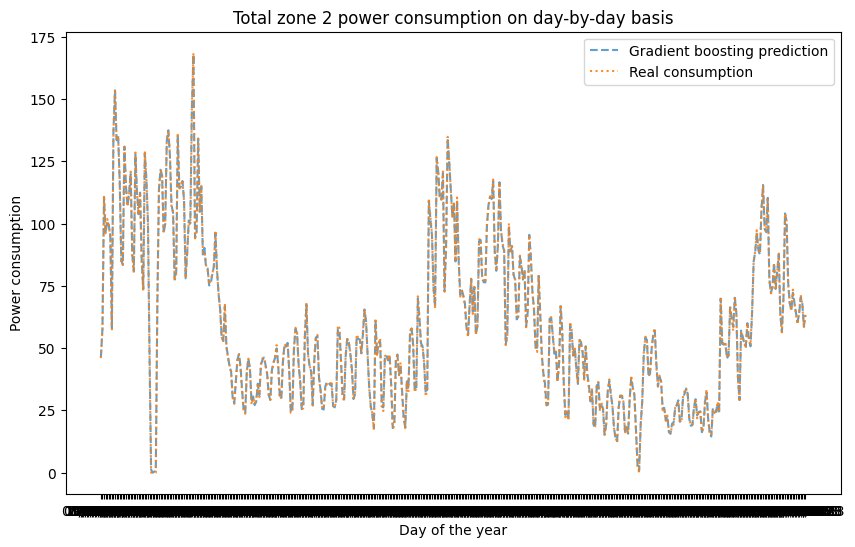

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(date_for_plot, y_pred_gb_onnx, '--', label='Gradient boosting prediction', alpha=0.7)
#plt.plot(date_for_plot, y_pred_rf_onnx, '-.', label='Random forest prediction', alpha=0.5)
plt.plot(date_for_plot, y_all, ':', label='Real consumption', alpha=0.5)
plt.title('Total zone 2 power consumption on day-by-day basis')
plt.xlabel('Day of the year')
plt.ylabel('Power consumption')
plt.legend()
plt.show()


In [69]:
start_index_2023 = np.where(target_time.astype('datetime64[Y]') == np.datetime64('2023'))[0][0]

print("L'indice où commence l'année 2023 :", start_index_2023)
print(target_time[start_index_2023])
target_time_2023 = target_time[start_index_2023:]
y_all_2023 = y_all[start_index_2023:]

y_pred_gb_2023 = y_pred_gb_onnx[start_index_2023:]
y_pred_rf_2023 = y_pred_rf_onnx[start_index_2023:]


L'indice où commence l'année 2023 : 238
2023-01-06T00:00:00


[0, 48, 87, 156]
end : 156
24
j'annote
Winter
end : 208
67
j'annote
Spring
end : 208
121
j'annote
Summer
end : 208
len filtered dates : 208 208
182
j'annote
Autumn


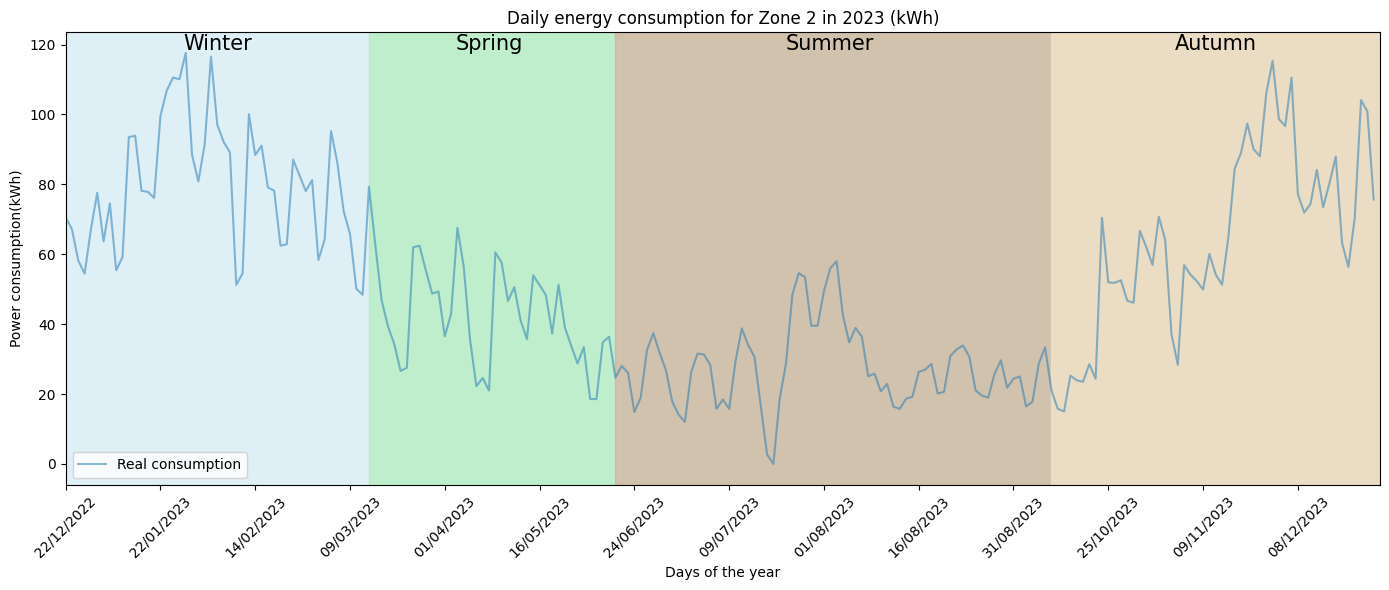

In [150]:
def first_occurrences(lst):
    first_indices = [0]  # Le premier indice est toujours inclus
    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1]:
            first_indices.append(i)
    return first_indices

def get_seasons(dates):
    # Début de l'hiver 2022 et fin de l'automne 2023
    start_date = np.datetime64('2022-12-01')
    end_date = np.datetime64('2023-12-31')

    spring_equinox = np.datetime64('2023-03-20')
    summer_solstice = np.datetime64('2023-06-21')
    autumn_equinox = np.datetime64('2023-09-22')
    winter_solstice = np.datetime64('2023-12-21')

    seasons = []
    for date in dates:
        if start_date <= date <= end_date:
            if date < spring_equinox or date >= winter_solstice:
                seasons.append('Winter')
            elif spring_equinox <= date < summer_solstice:
                seasons.append('Spring')
            elif summer_solstice <= date < autumn_equinox:
                seasons.append('Summer')
            elif autumn_equinox <= date < winter_solstice:
                seasons.append('Autumn')
    return np.array(seasons)

# Filtrer les dates entre le début de l'hiver 2022 et la fin de l'automne 2023
filter = (target_time >= np.datetime64('2022-12-22')) & (target_time < np.datetime64('2023-12-21'))
filtered_dates = target_time[filter]

filtered_y_all = y_all[filter]
#have the dates for plots
date_for_plot_filter = [0]* len(filtered_dates)
for i in range(len(filtered_dates)):
    date_str = np.datetime_as_string(filtered_dates[i], unit='D', casting='same_kind').split('T')[0]
    date_for_plot_filter[i] = '/'.join(date_str.split('-')[::-1])

# Calcul des saisons pour chaque date filtrée
seasons = get_seasons(filtered_dates)

# Trouver les indices où les saisons changent
season_change_indices = first_occurrences(seasons)

# Créer une liste des saisons avec une seule entrée pour chaque saison
season_labels = seasons[season_change_indices]
# Créer une liste des positions correspondant à chaque changement de saison dans les données
season_positions = season_change_indices

season_start_indices = [season_positions[i] for i in range(0, len(season_positions))]

# Tracer le graphique
plt.figure(figsize=(14, 6))  # Ajustez la taille de la figure selon le nombre d'années
plt.plot(range(len(filtered_y_all)), filtered_y_all, label='Real consumption', alpha=0.5)

# Colorier chaque période de saison avec une couleur différente, et mettre une légende
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
print(season_start_indices)
for i in range(len(season_start_indices)):
    start = season_start_indices[i]
    end = season_positions[i+len(season_labels)-1] if i+len(season_labels) <= len(season_positions) else len(filtered_y_all)
    print('end :', end)
    plt.axvspan(start, end, color=colors[i%len(colors)], alpha=0.4)

    if i==len(season_start_indices) - 1:
        print('len filtered dates :',len(filtered_dates), len(filtered_y_all))
        pos =(start+ len(filtered_y_all))//2      
    else:
        pos =(start+ season_start_indices[i+1])//2
    print(pos)
    print("j'annote")
    print(season_labels[i])
    plt.annotate(season_labels[i], xy=(pos, 0), xytext=(0, +298),
                textcoords='offset points', ha='center', fontsize=15, color='black')

plt.title('Daily energy consumption for Zone 2 in 2023 (kWh)')
plt.xlabel('Days of the year')
plt.ylabel('Power consumption(kWh)')

plt.xlim(0, len(filtered_y_all))
day_limit = 15
plt.xticks(ticks =range(len(filtered_y_all))[::day_limit] , labels=date_for_plot_filter[::day_limit], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [170]:
from challenge_utils import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

student_data_path = 'students_drahi_production_consumption_hourly.csv'

target_time, targets, predictors = build_training_data(student_data_path)

ntot = len(targets)
x_all = predictors.reshape(ntot, -1)
y_all = targets

indice_2023 = np.where(target_time >= np.datetime64('2023-01-01'))[0][0]
# separating train/test sets
n = 238
test_ind = np.arange(n, len(targets))
print(len(test_ind))

x_train, y_train, x_test, y_test = train_test_split(predictors, targets, test_ind)
print(len(y_train), len(y_test))

#  ──────────────────────────────────────────────────────────────────────────
# Simple modèle de régression RandomForest
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

time_start = time.time()
reg_gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42, verbose = 1)
reg_gb.fit(x_train, y_train)
y_pred_gb = reg_gb.predict(x_test)

print('time pour entrainement :', time.time() - time_start)

RelativeMSE_gb = relative_squared_error(y_pred_gb, y_test)

print('Gradient Boosting trained model RSE:', RelativeMSE_gb)


Loaded hourly data
Calculated daily energy consumption
Calculated predictor window
212
238 212
      Iter       Train Loss   Remaining Time 
         1        1027.9484           50.98s
         2         862.9843           52.96s
         3         724.4757           53.00s
         4         611.6319           51.83s
         5         517.8505           50.67s
         6         441.1694           50.30s
         7         375.5474           50.55s
         8         320.7653           51.74s
         9         274.0886           51.23s
        10         236.2176           50.39s
        20          62.4145           47.11s
        30          23.2705           43.03s
        40          10.6173           40.55s
        50           5.4137           37.61s
        60           3.2591           35.16s
        70           2.0665           32.80s
        80           1.3773           30.16s
        90           0.8934           27.70s
       100           0.6232           25.26s
    

In [172]:
from challenge_utils import train_test_split
from sklearn.ensemble import RandomForestRegressor

student_data_path = 'students_drahi_production_consumption_hourly.csv'

target_time, targets, predictors = build_training_data(student_data_path)

ntot = len(targets)
x_all = predictors.reshape(ntot, -1)
y_all = targets

indice_2023 = np.where(target_time >= np.datetime64('2023-01-01'))[0][0]
# separating train/test sets
n = 238
test_ind = np.arange(n, len(targets))
print(len(test_ind))

x_train, y_train, x_test, y_test = train_test_split(predictors, targets, test_ind)
print(len(y_train), len(y_test))

#  ──────────────────────────────────────────────────────────────────────────
# Simple modèle de régression RandomForest
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

time_start = time.time()
reg_rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42, verbose = 1)
reg_rf.fit(x_train, y_train)
y_pred_rf = reg_rf.predict(x_test)

print('time pour entrainement :', time.time() - time_start)

RelativeMSE_rf = relative_squared_error(y_pred_rf, y_test)

print('Random forest trained model RSE:', RelativeMSE_rf)

Loaded hourly data
Calculated daily energy consumption
Calculated predictor window
212
238 212


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s


time pour entrainement : 6.193688869476318
Random forest trained model RSE: 0.2582513189292531


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


212
212
(212,)


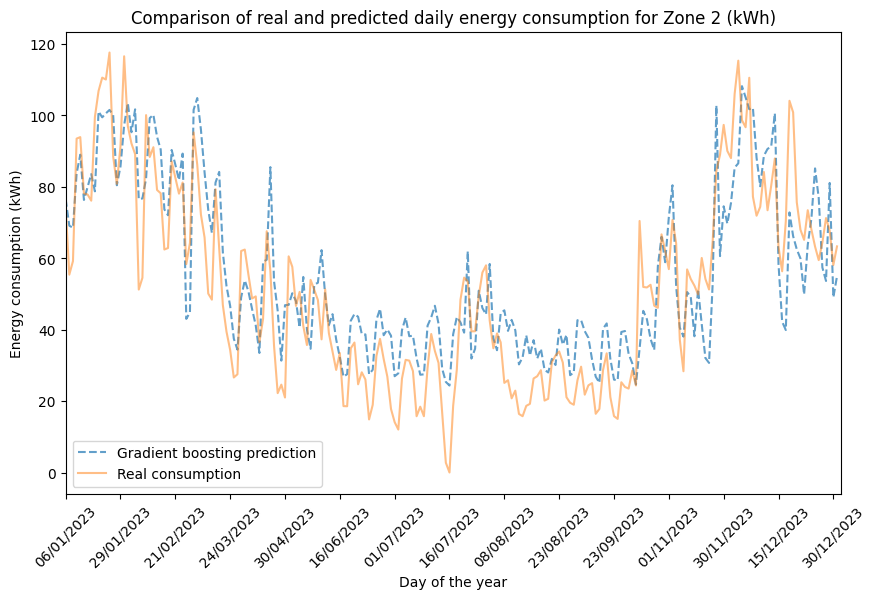

In [174]:
test_time = target_time[indice_2023:]
print(len(test_time))
date_for_plot_23 = [0]* len(test_time)
for i in range(len(test_time)):
    date_str = np.datetime_as_string(test_time[i], unit='D', casting='same_kind').split('T')[0]
    date_for_plot_23[i] = '/'.join(date_str.split('-')[::-1])
print(len(date_for_plot_23))
print(y_all[indice_2023:].shape)

plt.figure(figsize=(10, 6))
plt.plot(date_for_plot_23, y_pred_rf, '--', label='Gradient boosting prediction', alpha=0.7)
#plt.plot(date_for_plot, y_pred_rf_onnx, '-.', label='Random forest prediction', alpha=0.5)
plt.plot(date_for_plot_23, y_all[indice_2023:], label='Real consumption', alpha=0.5)
plt.title('Comparison of real and predicted daily energy consumption for Zone 2 (kWh)')
plt.xlabel('Day of the year')
plt.ylabel('Energy consumption (kWh)')

plt.xlim(0, len(y_pred_rf))
day_limit = 15
plt.xticks(ticks =range(len(y_pred_rf))[::day_limit] , labels=date_for_plot_23[::day_limit], rotation=45)
plt.legend()
plt.show()

## Explainability of the model:

In [205]:
import pandas as pd

student_data_path = 'students_drahi_production_consumption_hourly.csv'
csv = pd.read_csv(student_data_path)
csv.drop(columns=['datetime'], inplace=True)
columns_names = csv.columns.to_list()
print(columns_names)
print('size pf x_train' , x_train.shape[1]/7/24)

['AirTemp', 'pres', 'rain', 'rh', 'wd', 'ws', 'Global_Solar_Flux', 'Diffuse_Solar_Flux', 'Direct_Solar_Flux', 'Downwelling_IR_Flux', 'SAA', 'SZA', 'PAC', 'TGBT [kW]', 'kw_heater_corridor1_zone1', 'kw_heaters_corridor_zone2', 'kw_heaters_toilets_zone2', 'kw_heatingcoolingtotal_zone1', 'kw_heatingcoolingtotal_zone2', 'kw_lights_zone1', 'kw_lights_zone2', 'kw_total_zone1', 'kw_total_zone2', 'kw_ventilation_zone1', 'kw_ventilation_zone2', 'kw_water_heater_zone2', 'plugs_zone2']
size pf x_train 27.0


In [200]:
import pandas as pd

# Créer une liste de noms de jours et d'heures
jours = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7']
heures = [f'{i}h' for i in range(24)]

# Créer une liste de noms de colonnes pour le DataFrame
colonnes = [f'{variable}_{jour}_{heure}'  for heure in heures  for jour in jours for variable in columns_names]

# Créer un DataFrame Pandas avec les données x_train et les noms de colonnes personnalisés
df_train = pd.DataFrame(x_train, columns=colonnes)
df_test = pd.DataFrame(x_test, columns=colonnes)



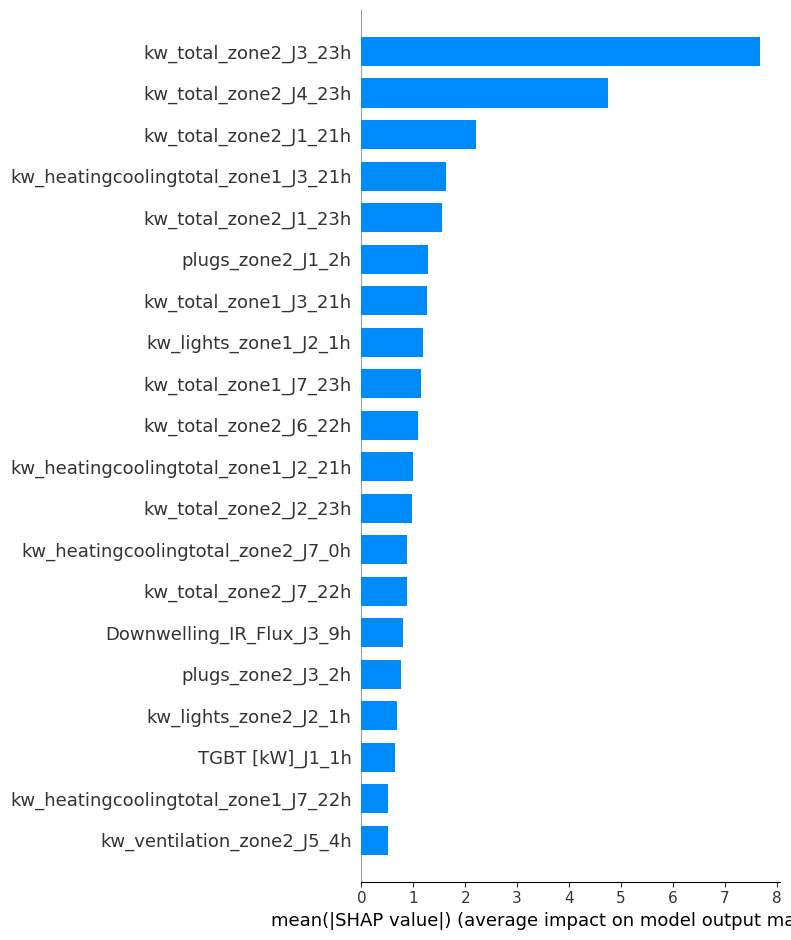

In [207]:
import shap

# Suppose que vous avez déjà entraîné votre modèle Gradient Boosting
# reg_gb.fit(x_train, y_train)

# Créer un explainer SHAP avec le modèle entraîné
explainer = shap.Explainer(reg_gb, df_train)

# Calculer les valeurs SHAP pour chaque échantillon de test
shap_values = explainer.shap_values(df_test)

# Résumer les valeurs SHAP
shap.summary_plot(shap_values, features=x_test, feature_names=colonnes, plot_type='bar')


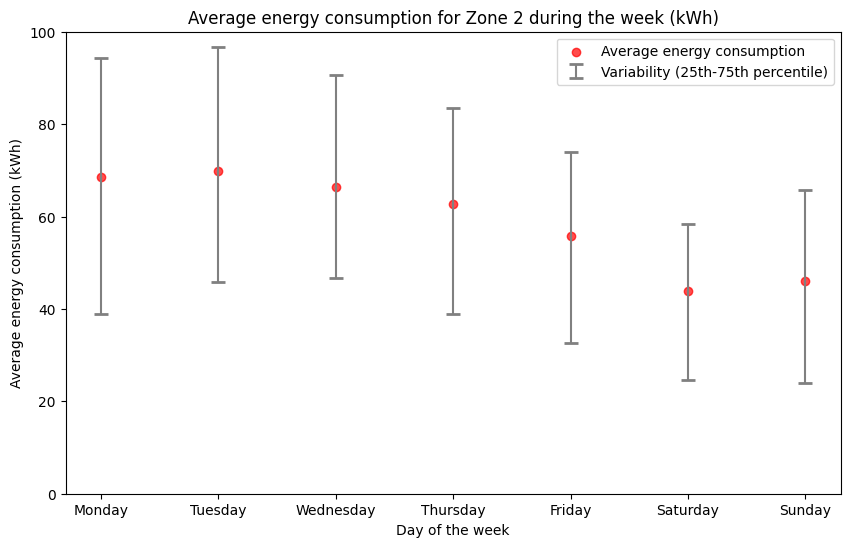

In [224]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the day of the week from the dates in target_time
days_of_week = [np.datetime64(date, 'D').astype('datetime64[D]').tolist().weekday() for date in target_time]

# Initialize lists to store the sum of consumption for each day of the week
consumption_per_day = [[] for _ in range(7)]

# Traverse the dates and corresponding targets to calculate the sum of consumption for each day of the week
for i in range(len(targets)):
    day = days_of_week[i]
    consumption_per_day[day].append(targets[i])

# Calculate the average consumption for each day of the week
average_consumption_per_day = [np.mean(consumptions) for consumptions in consumption_per_day]

# Calculate the 25th and 75th percentiles for each day of the week
percentile_25_per_day = [np.percentile(consumptions, 25) for consumptions in consumption_per_day]
percentile_75_per_day = [np.percentile(consumptions, 75) for consumptions in consumption_per_day]

# Define the days of the week
days_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the average consumption per day of the week with error bars
plt.figure(figsize=(10, 6))
plt.scatter(days_labels, average_consumption_per_day, color='red', alpha=0.7, label='Average energy consumption')
plt.errorbar(days_labels, average_consumption_per_day, yerr=[[average - percentile_25 for average, percentile_25 in zip(average_consumption_per_day, percentile_25_per_day)], [percentile_75 - average for average, percentile_75 in zip(average_consumption_per_day, percentile_75_per_day)]], fmt='none', ecolor='gray', capsize=5, capthick=2, label='Variability (25th-75th percentile)')
plt.title('Average energy consumption for Zone 2 during the week (kWh)')
plt.xlabel('Day of the week')
plt.ylabel('Average energy consumption (kWh)')
plt.ylim(0, 100)
plt.legend()
plt.show()

